## Mining exonic embedded microRNAs across different species 

### This script is written by ***Tyron Chang*** , the programming languages and tools used for this study are are shown below:

##### 1. Python (data cleaning and processing)

##### 2. BEDTools (overlapping the exonic microRNAs)

##### 3. Shell (use awk and basic command lines to convert tsv files into bed file)




The general method for this python script is shown below:

* #### Load dataset

* #### Data frame reprocessing ===> Creates two dataframes and concatenate them together

* #### Using Pandas to split and explode the dataframe.

* #### Remove all microRNAs in the finalized dataframe.

### Data Scraping

#### Instruction

The Data can be obtained from [this link ](https://genome.ucsc.edu/cgi-bin/hgTables), which will take you to UCSC table genome browser. 

You will see:

![Home Page](./homepage.png)


### Import necessary libraries

In [1]:
import pandas as pd

In [2]:
import re ### for data filtering using regex

In [3]:
import matplotlib.pyplot as plt

In [4]:
import os

### Using OOP to refactor code for miR analysis.

In [5]:
#The data (csv file) is obtained from UCSC table genome browser:
#Go to table browser in UCSC genome website.
#The website is https://genome.ucsc.edu/cgi-bin/hgTables----> this is human one. You can also choose different species.


In [6]:
current_dir=os.getcwd() # import current directoryb

### 1. Human data ( 1st step of data cleaning: reshape column)

In [7]:
import import_ipynb
from Data import HUMAN

importing Jupyter notebook from Data.ipynb


In [8]:
human=HUMAN(f'{current_dir}/UCSC_data_Human/human_genes_010324_NCBI.csv')#human gene coordinates tables

In [9]:
human.col_preprocess()

In [10]:
# human.df.columns=gene.df.columns.str.replace("#","") 
### Get rid of "#" symbols in the column names.

In [11]:
# gene.df.columns=gene.df.columns.str.replace('"',"")
### Remove '' in the column names.

In [12]:
human.drop()### drop 'bin' column

In [13]:
human.df.rename(columns={'name2':'gene_name'},inplace=True)
### Replace the column name

In [14]:
human_gene_df=human.select(['chrom','exonStarts','exonCount',
                        'gene_name','name'])
### Create a new data frame by selecting certain columns from the original dataframe.

In [15]:
human_gene_df['exonStarts']=human_gene_df['exonStarts'].str.replace(r',\Z','',regex=True)
### remove the comma by the end of the column prior to splitting the data. \Z means the end of the line.

In [16]:
human_gene_df['exonStarts']=human_gene_df['exonStarts'].str.split(",")

In [17]:
human_gene_df=human_gene_df.explode('exonStarts')

In [18]:
human_gene_df=human_gene_df.reset_index(drop=True)

In [19]:
human_gene_df_2=human.select(['exonEnds','exonCount','cdsStart','cdsEnd','strand','gene_name','name'])

In [20]:
human_gene_df_2['exonEnds']=human_gene_df_2['exonEnds'].str.replace(r',\Z','',regex=True)
### remove the comma at the end of column

In [21]:
human_gene_df_2['exonEnds']=human_gene_df_2['exonEnds'].str.split(",")

In [22]:
human_gene_df_2=human_gene_df_2.explode('exonEnds')

In [23]:
human_gene_df_2.head(50).reset_index(drop=True)

,exonEnds,exonCount,cdsStart,cdsEnd,strand,gene_name,name
0,67093604,5,67093004,67103382,-,C1orf141,XM_011541469.2
1,67095421,5,67093004,67103382,-,C1orf141,XM_011541469.2
2,67096321,5,67093004,67103382,-,C1orf141,XM_011541469.2
3,67103382,5,67093004,67103382,-,C1orf141,XM_011541469.2
4,67109072,5,67093004,67103382,-,C1orf141,XM_011541469.2
5,67093604,9,67093004,67127240,-,C1orf141,XM_017001276.2
6,67095421,9,67093004,67127240,-,C1orf141,XM_017001276.2
7,67096321,9,67093004,67127240,-,C1orf141,XM_017001276.2
8,67103382,9,67093004,67127240,-,C1orf141,XM_017001276.2
9,67111644,9,67093004,67127240,-,C1orf141,XM_017001276.2


In [24]:
human_gene_df_2.rename(columns={'gene_name':'Name','exonCount':'exon_count','name':'ID'},inplace=True)

In [25]:
human_gene_df_2 = human_gene_df_2.reset_index(drop=True)

### 2. Concatanate the dataframe (Reshape the dataframe) and remove all miRNA dataset (2nd step)

### Human

In [26]:
finalized_human_gene_df=pd.concat([human_gene_df,human_gene_df_2], axis=1)#### This file contains all human genes!

In [27]:
finalized_human_gene_df.shape

(2292643, 12)

In [28]:
finalized_human_gene_df.drop(columns=['exon_count','exonCount','gene_name','name'],inplace=True)

In [29]:
finalized_human_gene_df.columns

Index(['chrom', 'exonStarts', 'exonEnds', 'cdsStart', 'cdsEnd', 'strand',
       'Name', 'ID'],
      dtype='object')

In [30]:
####This regex only extracts microRNA but not lncRNA.
p=r'^MIR\d+(-\d+)*$|^MIR\d+[A-Z]([A-Z]|\d)*$(?<!HG)$|^hsa-mir|^MIRLET\d[A-Z]\d*$(?<!HG)$'

In [31]:
human_all_genes_no_miR_df=finalized_human_gene_df.loc[~finalized_human_gene_df['Name'].str.contains(
p, flags=re.I,regex=True)]####Remove all miR from the data. So this file has all human genes except for miRNAs

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_6490/633104615.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  human_all_genes_no_miR_df=finalized_human_gene_df.loc[~finalized_human_gene_df['Name'].str.contains(


In [32]:
human_all_genes_no_miR_df.shape

(2290504, 8)

In [33]:
human_all_genes_no_miR_df.columns

Index(['chrom', 'exonStarts', 'exonEnds', 'cdsStart', 'cdsEnd', 'strand',
       'Name', 'ID'],
      dtype='object')

In [34]:
### save the file
human_all_genes_no_miR_df.to_csv(f'{current_dir}/Human_bash_script/human_all_genes_no_miR_df_NCBI.tsv',sep='\t',index=False)

### 3. Extract miR data (3rd step)

#### human

In [35]:
human_df_miR=finalized_human_gene_df.loc[finalized_human_gene_df['Name'].str.contains(p,flags=re.I,regex=True)]

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_6490/1690666355.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  human_df_miR=finalized_human_gene_df.loc[finalized_human_gene_df['Name'].str.contains(p,flags=re.I,regex=True)]


In [36]:
human_df_miR.shape ### this dataset do not have lncRNA (e.g. miR-210HG) It has only miRNAs

(2139, 8)

In [37]:
human_df_miR.head(5)

,chrom,exonStarts,exonEnds,cdsStart,cdsEnd,strand,Name,ID
111924,chr1,17368,17436,17436,17436,-,MIR6859-1,NR_106918.1
111928,chr1,30365,30503,30503,30503,+,MIR1302-2,NR_036051.1
112070,chr1,187890,187958,187958,187958,-,MIR6859-2,NR_107062.1
112109,chr1,632614,632685,632685,632685,-,MIR12136,NR_162149.1
112540,chr1,1167103,1167198,1167198,1167198,+,MIR200B,NR_029639.1


In [38]:
###save the file for microRNA dataset
human_df_miR.to_csv(f'{current_dir}/Human_bash_script/df_humanmiR_NCBI.tsv',sep="\t",index=False)

### After this step, you first will use Bedtools to find all exonic.

### For running the Bedtools script,
* #### We will use GFF file retrieved from miRBase(hsa.gff)
* #### hsa.gff3 file will be converted into tsv file first(hsa.tsv)using BASH

#### Remember bedtools_human_exonic_miR.sh script will generate a tsv file that have all human exonic microRNAs 

(e.g.human_exonic_miR_NCBI.tsv)

### 5. Hence this step is to organize your exonic microRNA files
* we only want to have the primary miRNA name and their host genes
(Run this section of code after running bedtools_human_exonic_miR.sh)

## Organize the output file(exonic miRs)
* Asssign gene types (noncoding vs protein-coding genes).
* Map the regions of exonic micrornas (5'UTR, 3'UTR, CDS).
* Map all the locations of miRs (exonic, intronic, no host mRNA, span intron-exon.)

In [39]:
#bedtools will generate the overlapped exonic miR files


columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
         , 'hostgene_strand',
       'hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type'
         , 'miR_Name',
       'miR_strand', 'miR_ID']

In [40]:
# Organize and finalize the exonic microRNA files from the bedtools result

human_exonicmiR_df=pd.read_csv(f'{current_dir}/Human_tsv_file/human_exonic_miR_NCBI.tsv', sep='\t', header=None, names=columns)

In [41]:
human_exonicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr1,175953957,175972080,175971939,176149067,-,COP1,XM_047427799.1,chr1,175968370,175968479,miRNA_primary_transcript,Name=hsa-mir-1843,-,Alias=MI0032314
1,chr1,175953957,175972080,175971939,176149067,-,COP1,XM_047427799.1,chr1,175968440,175968459,miRNA,Name=hsa-miR-1843,-,Alias=MIMAT0039764
2,chr1,175953957,175972080,175971939,176149067,-,COP1,XM_017002080.3,chr1,175968370,175968479,miRNA_primary_transcript,Name=hsa-mir-1843,-,Alias=MI0032314
3,chr1,175953957,175972080,175971939,176149067,-,COP1,XM_017002080.3,chr1,175968440,175968459,miRNA,Name=hsa-miR-1843,-,Alias=MIMAT0039764
4,chr1,175953957,175972080,175971939,176175951,-,COP1,XM_017002071.2,chr1,175968370,175968479,miRNA_primary_transcript,Name=hsa-mir-1843,-,Alias=MI0032314


In [42]:
### Extract only primary miR transcript
human_exonicmiR_df=human_exonicmiR_df.loc[human_exonicmiR_df['miR_type']=="miRNA_primary_transcript"]

In [43]:
human_exonicmiR_df.drop(columns=['miR_ID'],inplace=True)

In [44]:
#Change string values in the columns of exonic miR files

# Reset the index
human_exonicmiR_df = human_exonicmiR_df.reset_index(drop=True)

# Create a new DataFrame with the updated "miR_name" column
new_df = pd.DataFrame({"miR_name": human_exonicmiR_df["miR_Name"].str.replace("Name=", "")})

# Concatenate the new DataFrame with the remaining columns from the original DataFrame
human_exonicmiR_df.insert(12,"miR_name", new_df['miR_name'])
human_exonicmiR_df.drop(columns=["miR_Name"],inplace=True)

In [45]:
human_exonicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_name,miR_strand
0,chr1,175953957,175972080,175971939,176149067,-,COP1,XM_047427799.1,chr1,175968370,175968479,miRNA_primary_transcript,hsa-mir-1843,-
1,chr1,175953957,175972080,175971939,176149067,-,COP1,XM_017002080.3,chr1,175968370,175968479,miRNA_primary_transcript,hsa-mir-1843,-
2,chr1,175953957,175972080,175971939,176175951,-,COP1,XM_017002071.2,chr1,175968370,175968479,miRNA_primary_transcript,hsa-mir-1843,-
3,chr1,175953957,175972080,175971939,176175951,-,COP1,XM_017002073.2,chr1,175968370,175968479,miRNA_primary_transcript,hsa-mir-1843,-
4,chr1,175953957,175972080,175971939,176206978,-,COP1,XM_017002059.3,chr1,175968370,175968479,miRNA_primary_transcript,hsa-mir-1843,-


In [46]:
human_exonicmiR_df.shape

(514, 14)

In [47]:
csv_file_path=f'{current_dir}/Human_csv_file'

In [48]:
#save the human exonic data (tsv) file as a csv file
human_exonicmiR_df.to_csv(f'{csv_file_path}/human_exonic_miR_NCBI.csv',index=False)
#convert to csv file

## 6. Before you run bedtools_intronic_miRs.sh, reshape the dataframe first and map intronic miRNA with the following steps

The reason for reshaping the dataframe are the following:
* We need to use txStart, txEnd coordinates instead of exon coordinates to find intronic miRNAs. 
* The finalized tsv files will be "human_all_genes_no_miR_df_TX_loc_NCBI.tsv".
* We will use this new tsv file to overlap the coordinates of miR to map all the intronic miRNAs.
* Remember the new file has txStart and txEnd locations instead of exon locations.
* bedtools_intronic_miRs.sh will also map the rest of miRNAs that don't have mRNA host genes.

### Human

In [49]:
human_gene_df_tx=human.select(['chrom','txStart','txEnd','cdsStart','cdsEnd','strand',
                        'gene_name','name'])

In [50]:
human_gene_df_tx.rename(columns={'gene_name':'Name','name':'ID'},inplace=True)

In [51]:
#Use the same regex again=>p=r'^MIR\d+(-\d+)*$|^MIR\d+[A-Z]([A-Z]|\d)*$(?<!HG)$|^hsa-mir|^MIRLET\d[A-Z]\d*$(?<!HG)$'

In [52]:
human_all_genes_no_miR_df_TX_loc=human_gene_df_tx.loc[~human_gene_df_tx['Name'].str.contains(
p, flags=re.I,regex=True)]####Remove all miR from the data.

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_6490/835993477.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  human_all_genes_no_miR_df_TX_loc=human_gene_df_tx.loc[~human_gene_df_tx['Name'].str.contains(


In [53]:
human_all_genes_no_miR_df_TX_loc.to_csv(f'{current_dir}/Human_tsv_file/human_all_genes_no_miR_df_TX_loc_NCBI.tsv',sep='\t',index=False)

In [54]:
##### use this file to find intronic miRNAs, by running bedtools_human_intronic_miR

In [55]:
#### Run bedtools_human_nonexonic_miR.sh and then bedtools_human_intronic_miR.sh

## 7. Use Gene_func file to add additional columns to the dataframe (7th step). 
* This new column will have a new column called gene type. Bascially this new dataframe will tell you if the host gene is a protein or non-coding RNA.

### Human

In [56]:
from Gene_func import Gene_type ### This function will assign the type of genes

importing Jupyter notebook from Gene_func.ipynb


In [57]:
Gene_type(human_exonicmiR_df,'hostgene_cdsStart','hostgene_cdsEnd','gene_type')

<string>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'non-coding gene' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


In [58]:
human_exonicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_name,miR_strand,gene_type
0,chr1,175953957,175972080,175971939,176149067,-,COP1,XM_047427799.1,chr1,175968370,175968479,miRNA_primary_transcript,hsa-mir-1843,-,protein-coding gene
1,chr1,175953957,175972080,175971939,176149067,-,COP1,XM_017002080.3,chr1,175968370,175968479,miRNA_primary_transcript,hsa-mir-1843,-,protein-coding gene
2,chr1,175953957,175972080,175971939,176175951,-,COP1,XM_017002071.2,chr1,175968370,175968479,miRNA_primary_transcript,hsa-mir-1843,-,protein-coding gene
3,chr1,175953957,175972080,175971939,176175951,-,COP1,XM_017002073.2,chr1,175968370,175968479,miRNA_primary_transcript,hsa-mir-1843,-,protein-coding gene
4,chr1,175953957,175972080,175971939,176206978,-,COP1,XM_017002059.3,chr1,175968370,175968479,miRNA_primary_transcript,hsa-mir-1843,-,protein-coding gene


In [59]:
human_exonicmiR_df.drop_duplicates(subset=['miR_name'],inplace=True)

In [60]:
human_exonicmiR_df.to_csv(f'{csv_file_path}/human_exonic_miR(gene_type)_NCBI.csv',index=False)

In [61]:
# stop here 070624 run exonic mouse.sh

## Intronic miRNAs organization

In [62]:
#bedtools will generate the overlapped intronic miR files


columns_2=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
         , 'hostgene_strand',
       'hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type'
         , 'miR_Name',
       'miR_strand', 'miR_ID']

In [64]:
# Organize and finalize the exonic microRNA files from the bedtools result

human_intronicmiR_df=pd.read_csv(f'{current_dir}/Human_tsv_file/human_intronic_miR_NCBI.tsv', sep='\t', header=None, names=columns_2)

In [65]:
human_intronicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_006642.5,chr1,243346176,243346255,miRNA_primary_transcript,Name=hsa-mir-4677,+,Alias=MI0017308
1,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_006642.5,chr1,243346188,243346209,miRNA,Name=hsa-miR-4677-5p,+,Alias=MIMAT0019760
2,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_006642.5,chr1,243346225,243346246,miRNA,Name=hsa-miR-4677-3p,+,Alias=MIMAT0019761
3,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350247.2,chr1,243346176,243346255,miRNA_primary_transcript,Name=hsa-mir-4677,+,Alias=MI0017308
4,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350247.2,chr1,243346188,243346209,miRNA,Name=hsa-miR-4677-5p,+,Alias=MIMAT0019760


In [66]:
### Extract only primary miR transcript
human_intronicmiR_df=human_intronicmiR_df.loc[human_intronicmiR_df['miR_type']=="miRNA_primary_transcript"]

In [67]:
human_intronicmiR_df.drop(columns=['miR_ID'],inplace=True)

In [68]:
#Change string values in the columns of exonic miR files

# Reset the index
human_intronicmiR_df= human_intronicmiR_df.reset_index(drop=True)

# Create a new DataFrame with the updated "miR_name" column
hg_intron_new_df = pd.DataFrame({"miR_name": human_intronicmiR_df["miR_Name"].str.replace("Name=", "")})

# Concatenate the new DataFrame with the remaining columns from the original DataFrame
human_intronicmiR_df.insert(12,"miR_name", hg_intron_new_df ['miR_name'])
human_intronicmiR_df.drop(columns=["miR_Name"],inplace=True)

In [69]:
human_intronicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_name,miR_strand
0,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_006642.5,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+
1,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350247.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+
2,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350246.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+
3,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_001350248.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+
4,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350251.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+


In [70]:
human_intronicmiR_df.shape

(8191, 14)

In [71]:
#save as a csv file
human_intronicmiR_df.to_csv(f'{csv_file_path}/human_intronic_miR_NCBI.csv',index=False)#convert to csv file

In [72]:
Gene_type(human_intronicmiR_df,'hostgene_cdsStart','hostgene_cdsEnd','gene_type')

<string>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'non-coding gene' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


In [73]:
human_intronicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_name,miR_strand,gene_type
0,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_006642.5,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+,protein-coding gene
1,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350247.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+,protein-coding gene
2,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350246.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+,protein-coding gene
3,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_001350248.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+,protein-coding gene
4,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350251.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+,protein-coding gene


In [74]:
human_intronicmiR_df.to_csv(f'{csv_file_path}/human_intronic_miR(gene_type)_NCBI.csv',index=False)

## Map percentages of intronic, exonic, other microRNAs using bedtools

* This step is also run after bedtools files are run (bedtools_human_nonoverlap_miR.sh)

### Human

In [76]:
columns_3=['miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_Name','miR_strand', 'miR_ID']

In [78]:
human_miR_miRBase_df=pd.read_csv(f'{current_dir}/Human_tsv_file/hsa_finalized.tsv', sep='\t', header=None, names=columns_3)
### this file containsall micrornas

In [79]:
human_miR_miRBase_df.head()

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr1,17369,17436,miRNA_primary_transcript,Name=hsa-mir-6859-1,-,Alias=MI0022705
1,chr1,17409,17431,miRNA,Name=hsa-miR-6859-5p,-,Alias=MIMAT0027618
2,chr1,17369,17391,miRNA,Name=hsa-miR-6859-3p,-,Alias=MIMAT0027619
3,chr1,30366,30503,miRNA_primary_transcript,Name=hsa-mir-1302-2,+,Alias=MI0006363
4,chr1,30438,30458,miRNA,Name=hsa-miR-1302,+,Alias=MIMAT0005890


In [ ]:
# stop here 070524

### Human intragenetic miRNAs(intronic/exonic miRs)

#### Human exonic microRNA files

In [202]:
mRNA_miR_columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd', 'hostgene_strand',
              'hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 
              'miR_Name','miR_strand', 'miR_ID']

In [203]:
Human_exonic_miR_df=pd.read_csv('./Human/tsv_file/human_exonic_miR_NCBI.tsv', sep='\t', header=None, names=mRNA_miR_columns)

In [204]:
Human_exonic_miR_df=Human_exonic_miR_df.drop(columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
, 'hostgene_strand','hostgene_Name', 'hostgene_NCBI_ID'])

In [205]:
Human_exonic_miR_df['type']='exonic miR'

In [206]:
Human_exonic_miR_df=Human_exonic_miR_df.loc[Human_exonic_miR_df['miR_type']=="miRNA_primary_transcript"]

In [207]:
Human_exonic_miR_df=Human_exonic_miR_df.drop_duplicates(subset=['miR_Name'])

In [208]:
Human_exonic_miR_df.shape

(201, 8)

In [209]:
Human_exonic_miR_df.to_excel('./Human/Human_exonic_miR_df.xlsx',index=False)### save it as a exonic miRNA excel file for later use
### this step is to use for mapping intronic and intergenetic miRNAs

#### Human intronic microRNA files
(Run this after running bedtools_intronic_miRs.sh)

In [210]:
###all intronic micrornas
Human_intronic_miR_df=pd.read_csv('./Human/tsv_file/human_intronic_miR_NCBI.tsv', sep='\t', header=None, names=mRNA_miR_columns)

In [211]:
Human_intronic_miR_df

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_006642.5,chr1,243346176,243346255,miRNA_primary_transcript,Name=hsa-mir-4677,+,Alias=MI0017308
1,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_006642.5,chr1,243346188,243346209,miRNA,Name=hsa-miR-4677-5p,+,Alias=MIMAT0019760
2,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_006642.5,chr1,243346225,243346246,miRNA,Name=hsa-miR-4677-3p,+,Alias=MIMAT0019761
3,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350247.2,chr1,243346176,243346255,miRNA_primary_transcript,Name=hsa-mir-4677,+,Alias=MI0017308
4,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350247.2,chr1,243346188,243346209,miRNA,Name=hsa-miR-4677-5p,+,Alias=MIMAT0019760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21585,chr22,50387645,50445090,50393749,50444247,+,PPP6R2,XM_047441638.1,chr22,50407456,50407474,miRNA,Name=hsa-miR-12114,+,Alias=MIMAT0049008
21586,chr22,50394051,50445090,50414623,50444247,+,PPP6R2,XM_017029133.2,chr22,50407442,50407524,miRNA_primary_transcript,Name=hsa-mir-12114,+,Alias=MI0039716
21587,chr22,50394051,50445090,50414623,50444247,+,PPP6R2,XM_017029133.2,chr22,50407456,50407474,miRNA,Name=hsa-miR-12114,+,Alias=MIMAT0049008
21588,chr22,50394065,50445090,50394134,50444247,+,PPP6R2,XM_011530740.3,chr22,50407442,50407524,miRNA_primary_transcript,Name=hsa-mir-12114,+,Alias=MI0039716


In [212]:
Human_intronic_miR_df=Human_intronic_miR_df.drop(columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
, 'hostgene_strand','hostgene_Name', 'hostgene_NCBI_ID'])

In [213]:
Human_intronic_miR_df['type']='intronic miR'

In [214]:
Human_intronic_miR_df=Human_intronic_miR_df.loc[Human_intronic_miR_df['miR_type']=="miRNA_primary_transcript"]

In [215]:
Human_intronic_miR_df.head()

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,type
0,chr1,243346176,243346255,miRNA_primary_transcript,Name=hsa-mir-4677,+,Alias=MI0017308,intronic miR
3,chr1,243346176,243346255,miRNA_primary_transcript,Name=hsa-mir-4677,+,Alias=MI0017308,intronic miR
6,chr1,243346176,243346255,miRNA_primary_transcript,Name=hsa-mir-4677,+,Alias=MI0017308,intronic miR
9,chr1,243346176,243346255,miRNA_primary_transcript,Name=hsa-mir-4677,+,Alias=MI0017308,intronic miR
12,chr1,243346176,243346255,miRNA_primary_transcript,Name=hsa-mir-4677,+,Alias=MI0017308,intronic miR


In [216]:
Human_intronic_miR_df=Human_intronic_miR_df.drop_duplicates(subset=['miR_Name'])

In [217]:
Human_intronic_miR_df.shape

(969, 8)

### Mouse intragenetic miRNAs(intronic/exonic miRs)

In [218]:
Mouse_exonic_miR_df=pd.read_csv('./Mouse/tsv_file/mouse_exonic_miR_NCBI.tsv', sep='\t', header=None, names=mRNA_miR_columns)

In [219]:
Mouse_exonic_miR_df=Mouse_exonic_miR_df.drop(columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
, 'hostgene_strand','hostgene_Name', 'hostgene_NCBI_ID'])

In [220]:
Mouse_exonic_miR_df['type']='exonic miR'

In [221]:
Mouse_exonic_miR_df=Mouse_exonic_miR_df.loc[Mouse_exonic_miR_df['miR_type']=="miRNA_primary_transcript"]

In [222]:
Mouse_exonic_miR_df=Mouse_exonic_miR_df.drop_duplicates(subset=['miR_Name'])

In [223]:
Mouse_exonic_miR_df.shape

(170, 8)

In [224]:
Mouse_exonic_miR_df.to_excel('./Mouse/tsv_file/Mouse_exonic_miR_df.xlsx',index=False)### save it as a exonic miRNA excel file for later use
### this step is to use for mapping intronic and intergenetic miRNAs

#### Mouse intronic microRNA files
(Run this after running bedtools_mouse_intronic_miR.sh)

In [225]:
###all intronic micrornas
Mouse_intronic_miR_df=pd.read_csv('./Mouse/tsv_file/mouse_intronic_miR_NCBI.tsv', sep='\t', header=None, names=mRNA_miR_columns)

In [226]:
Mouse_intronic_miR_df

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr1,160219173,160792925,160224215,160740889,-,Rabgap1l,XM_006496877.3,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914
1,chr1,160219173,160792925,160224215,160740889,-,Rabgap1l,XM_006496877.3,chr1,160295885,160295907,miRNA,Name=mmu-miR-1927,-,Alias=MIMAT0009390
2,chr1,160219173,160792972,160224215,160740889,-,Rabgap1l,XM_006496876.2,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914
3,chr1,160219173,160792972,160224215,160740889,-,Rabgap1l,XM_006496876.2,chr1,160295885,160295907,miRNA,Name=mmu-miR-1927,-,Alias=MIMAT0009390
4,chr1,160219173,160792987,160224215,160739052,-,Rabgap1l,XM_006496878.4,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11868,chr19,52991180,53015341,52991590,53013471,-,Xpnpep1,XM_017318075.2,chr19,53010679,53010701,miRNA,Name=mmu-miR-6407,-,Alias=MIMAT0025160
11869,chr19,52991180,53032644,52991590,53025375,-,Xpnpep1,XM_011247159.2,chr19,53010656,53010756,miRNA_primary_transcript,Name=mmu-mir-6407,-,Alias=MI0021944
11870,chr19,52991180,53032644,52991590,53025375,-,Xpnpep1,XM_011247159.2,chr19,53010679,53010701,miRNA,Name=mmu-miR-6407,-,Alias=MIMAT0025160
11871,chr19,52991182,53038570,52991590,53025375,-,Xpnpep1,NM_001374834.1,chr19,53010656,53010756,miRNA_primary_transcript,Name=mmu-mir-6407,-,Alias=MI0021944


In [227]:
Mouse_intronic_miR_df=Mouse_intronic_miR_df.drop(columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
, 'hostgene_strand','hostgene_Name', 'hostgene_NCBI_ID'])

In [228]:
Mouse_intronic_miR_df['type']='intronic miR'

In [229]:
Mouse_intronic_miR_df=Mouse_intronic_miR_df.loc[Mouse_intronic_miR_df['miR_type']=="miRNA_primary_transcript"]

In [230]:
Mouse_intronic_miR_df.head()

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,type
0,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914,intronic miR
2,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914,intronic miR
4,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914,intronic miR
6,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914,intronic miR
8,chr1,160295864,160295972,miRNA_primary_transcript,Name=mmu-mir-1927,-,Alias=MI0009914,intronic miR


In [231]:
Mouse_intronic_miR_df.drop_duplicates(subset=['miR_Name'],inplace=True)

In [232]:
Mouse_intronic_miR_df.shape

(599, 8)

### Zebrafish intragenetic miRNAs(intronic/exonic miRs)

#### Zebrafish exonic microRNA files

In [229]:
mRNA_miR_columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd', 'hostgene_strand',
              'hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 
              'miR_Name','miR_strand', 'miR_ID']

In [230]:
Zfish_exonic_miR_df=pd.read_csv('./Zebrafish/zfish_exonic_miR_NCBI.tsv', sep='\t', header=None, names=mRNA_miR_columns)

In [231]:
Zfish_exonic_miR_df=Zfish_exonic_miR_df.drop(columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
, 'hostgene_strand','hostgene_Name', 'hostgene_NCBI_ID'])

In [232]:
Zfish_exonic_miR_df['type']='exonic miR'

In [233]:
Zfish_exonic_miR_df=Zfish_exonic_miR_df.loc[Zfish_exonic_miR_df['miR_type']=="miRNA_primary_transcript"]

In [234]:
Zfish_exonic_miR_df=Zfish_exonic_miR_df.drop_duplicates(subset=['miR_Name'])

In [235]:
Zfish_exonic_miR_df.shape

(5, 8)

In [236]:
Zfish_exonic_miR_df.to_excel('./Zebrafish/Zfish_exonic_miR_df.xlsx',index=False)### save it as a exonic miRNA excel file for later use
### this step is to use for mapping intronic and intergenetic miRNAs

#### Zebrafish intronic microRNA files
(Run this after running bedtools_intronic_miRs.sh)

In [237]:
###all intronic micrornas
Zfish_intronic_miR_df=pd.read_csv('./Zebrafish/zfish_intronic_miR_NCBI.tsv', sep='\t', header=None, names=mRNA_miR_columns)

In [238]:
Zfish_intronic_miR_df

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr2,1789112,2324345,1791866,1979777,-,MYT1L,XM_011510321.3,chr2,2301358,2301434,miRNA_primary_transcript,Name=dre-mir-460,-,Alias=MI0002181
1,chr2,1789112,2324345,1791866,1979777,-,MYT1L,XM_011510321.3,chr2,2301403,2301424,miRNA,Name=dre-miR-460-5p,-,Alias=MIMAT0001887
2,chr2,1789112,2324345,1791866,1979777,-,MYT1L,XM_011510321.3,chr2,2301366,2301387,miRNA,Name=dre-miR-460-3p,-,Alias=MIMAT0001888
3,chr2,1789112,2324345,1791866,1979777,-,MYT1L,NM_001329845.1,chr2,2301358,2301434,miRNA_primary_transcript,Name=dre-mir-460,-,Alias=MI0002181
4,chr2,1789112,2324345,1791866,1979777,-,MYT1L,NM_001329845.1,chr2,2301403,2301424,miRNA,Name=dre-miR-460-5p,-,Alias=MIMAT0001887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,chr22,22820980,22884599,22884599,22884599,-,LOC105372948,XR_938047.2,chr22,22825843,22825864,miRNA,Name=dre-miR-181b-5p,-,Alias=MIMAT0001270
970,chr22,22820980,22884599,22884599,22884599,-,LOC105372948,XR_938047.2,chr22,22825804,22825824,miRNA,Name=dre-miR-181b-3-3p,-,Alias=MIMAT0048656
971,chr22,22820980,22884599,22884599,22884599,-,LOC105372948,XR_938047.2,chr22,22826004,22826087,miRNA_primary_transcript,Name=dre-mir-181a-1,-,Alias=MI0001380
972,chr22,22820980,22884599,22884599,22884599,-,LOC105372948,XR_938047.2,chr22,22826052,22826074,miRNA,Name=dre-miR-181a-5p,-,Alias=MIMAT0001623


In [239]:
Zfish_intronic_miR_df=Zfish_intronic_miR_df.drop(columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
, 'hostgene_strand','hostgene_Name', 'hostgene_NCBI_ID'])

In [240]:
Zfish_intronic_miR_df['type']='intronic miR'

In [241]:
Zfish_intronic_miR_df=Zfish_intronic_miR_df.loc[Zfish_intronic_miR_df['miR_type']=="miRNA_primary_transcript"]

In [242]:
Zfish_intronic_miR_df.head()

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,type
0,chr2,2301358,2301434,miRNA_primary_transcript,Name=dre-mir-460,-,Alias=MI0002181,intronic miR
3,chr2,2301358,2301434,miRNA_primary_transcript,Name=dre-mir-460,-,Alias=MI0002181,intronic miR
6,chr2,2301358,2301434,miRNA_primary_transcript,Name=dre-mir-460,-,Alias=MI0002181,intronic miR
9,chr2,2301358,2301434,miRNA_primary_transcript,Name=dre-mir-460,-,Alias=MI0002181,intronic miR
12,chr2,2301358,2301434,miRNA_primary_transcript,Name=dre-mir-460,-,Alias=MI0002181,intronic miR


In [243]:
Zfish_intronic_miR_df=Zfish_intronic_miR_df.drop_duplicates(subset=['miR_Name'])

In [244]:
Zfish_intronic_miR_df.shape

(41, 8)

### Human intergenetic microRNA files

In [233]:
columns=['miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_Name','miR_strand', 'miR_ID']

In [234]:
###all NO host mRNA micrornas
Human_no_host_mRNA_miR_df=pd.read_csv('./Human/tsv_file/human_miR_no_hostmRNA_NCBI.tsv', sep='\t', header=None, names=columns)

In [235]:
Human_no_host_mRNA_miR_df['type']='no host mRNA miR'

In [236]:
Human_no_host_mRNA_miR_df=Human_no_host_mRNA_miR_df.loc[Human_no_host_mRNA_miR_df['miR_type']=="miRNA_primary_transcript"]

In [237]:
Human_no_host_mRNA_miR_df=Human_no_host_mRNA_miR_df.drop_duplicates(subset=['miR_Name'])

In [238]:
Human_no_host_mRNA_miR_df.shape

(718, 8)

In [239]:
Human_miR_type_df=pd.concat([Human_exonic_miR_df, Human_intronic_miR_df, Human_no_host_mRNA_miR_df], axis=0)

In [240]:
Human_miR_type_df=Human_miR_type_df.drop(columns=['miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_ID','miR_strand'])

In [241]:
Human_miR_type_df.head()

,miR_Name,type
0,Name=hsa-mir-1843,exonic miR
32,Name=hsa-mir-34a,exonic miR
39,Name=hsa-mir-137,exonic miR
42,Name=hsa-mir-2682,exonic miR
45,Name=hsa-mir-197,exonic miR


In [249]:
Human_miR_type_finalized_df=human_miR_miRBase_df.merge(Human_miR_type_df,on="miR_Name",how='left')

In [250]:
Human_miR_type_finalized_df=Human_miR_type_finalized_df.loc[Human_miR_type_finalized_df['miR_type']=="miRNA_primary_transcript"]
Human_miR_type_finalized_df.head(50)

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,type
0,chr1,17369,17436,miRNA_primary_transcript,Name=hsa-mir-6859-1,-,Alias=MI0022705,intronic miR
3,chr1,30366,30503,miRNA_primary_transcript,Name=hsa-mir-1302-2,+,Alias=MI0006363,exonic miR
5,chr1,187891,187958,miRNA_primary_transcript,Name=hsa-mir-6859-2,-,Alias=MI0026420,intronic miR
8,chr1,632615,632685,miRNA_primary_transcript,Name=hsa-mir-12136,-,Alias=MI0039740,no host mRNA miR
10,chr1,1167104,1167198,miRNA_primary_transcript,Name=hsa-mir-200b,+,Alias=MI0000342,exonic miR
13,chr1,1167863,1167952,miRNA_primary_transcript,Name=hsa-mir-200a,+,Alias=MI0000737,exonic miR
16,chr1,1169005,1169087,miRNA_primary_transcript,Name=hsa-mir-429,+,Alias=MI0001641,exonic miR
18,chr1,1296110,1296170,miRNA_primary_transcript,Name=hsa-mir-6726,-,Alias=MI0022571,intronic miR
21,chr1,1312502,1312566,miRNA_primary_transcript,Name=hsa-mir-6727,-,Alias=MI0022572,intronic miR
24,chr1,1339650,1339708,miRNA_primary_transcript,Name=hsa-mir-6808,-,Alias=MI0022653,intronic miR


In [251]:
Human_miR_type_finalized_df['type']=Human_miR_type_finalized_df['type'].fillna("partially overlapped with exons")

In [252]:
Human_miR_type_finalized_df['miR_Name']=Human_miR_type_finalized_df['miR_Name'].str.replace("Name=","")

In [253]:
Human_miR_type_finalized_df.to_excel('./Human/Human_miR_type_finalized_df.xlsx',index=False)

### Mouse intergenetic microRNA files

In [260]:
###all NO host mRNA micrornas
Mouse_no_host_mRNA_miR_df=pd.read_csv('./Mouse/tsv_file/mouse_miR_no_hostmRNA_NCBI.tsv', sep='\t', header=None, names=columns)

In [261]:
Mouse_no_host_mRNA_miR_df['type']='no host mRNA miR'

In [262]:
Mouse_no_host_mRNA_miR_df=Mouse_no_host_mRNA_miR_df.loc[Mouse_no_host_mRNA_miR_df['miR_type']=="miRNA_primary_transcript"]

In [263]:
Mouse_no_host_mRNA_miR_df=Mouse_no_host_mRNA_miR_df.drop_duplicates(subset=['miR_Name'])

In [264]:
Mouse_no_host_mRNA_miR_df.shape

(432, 8)

In [265]:
Mouse_miR_type_df=pd.concat([Mouse_exonic_miR_df, Mouse_intronic_miR_df, Mouse_no_host_mRNA_miR_df], axis=0)

In [266]:
Mouse_miR_type_df=Mouse_miR_type_df.drop(columns=['miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_ID','miR_strand'])

In [270]:
Mouse_miR_type_finalized_df=mouse_miR_miRBase_df.merge(Mouse_miR_type_df,on="miR_Name",how='left')

In [271]:
Mouse_miR_type_finalized_df=Mouse_miR_type_finalized_df.loc[Mouse_miR_type_finalized_df['miR_type']=="miRNA_primary_transcript"]


In [272]:
Mouse_miR_type_finalized_df.head(50)

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,type
0,chr1,12425986,12426106,miRNA_primary_transcript,Name=mmu-mir-6341,+,Alias=MI0021869,no host mRNA miR
2,chr1,20679010,20679082,miRNA_primary_transcript,Name=mmu-mir-206,+,Alias=MI0000249,intronic miR
5,chr1,20682769,20682887,miRNA_primary_transcript,Name=mmu-mir-133b,+,Alias=MI0000821,exonic miR
8,chr1,23272269,23272339,miRNA_primary_transcript,Name=mmu-mir-30a,+,Alias=MI0000144,no host mRNA miR
11,chr1,23291701,23291784,miRNA_primary_transcript,Name=mmu-mir-30c-2,+,Alias=MI0000548,no host mRNA miR
14,chr1,29421488,29421612,miRNA_primary_transcript,Name=mmu-mir-6342,+,Alias=MI0021870,no host mRNA miR
16,chr1,34117359,34117431,miRNA_primary_transcript,Name=mmu-mir-6896,+,Alias=MI0022743,intronic miR
19,chr1,34433121,34433199,miRNA_primary_transcript,Name=mmu-mir-5103,-,Alias=MI0018011,no host mRNA miR
21,chr1,36144252,36144313,miRNA_primary_transcript,Name=mmu-mir-6897,-,Alias=MI0022744,intronic miR
24,chr1,36348682,36348758,miRNA_primary_transcript,Name=mmu-mir-6898,-,Alias=MI0022745,intronic miR


In [273]:
Mouse_miR_type_finalized_df['type']=Mouse_miR_type_finalized_df['type'].fillna("partially overlapped with exons")

In [274]:
Mouse_miR_type_finalized_df['miR_Name']=Mouse_miR_type_finalized_df['miR_Name'].str.replace("Name=","")

In [275]:
Mouse_miR_type_finalized_df.shape

(1269, 8)

In [276]:
Mouse_miR_type_finalized_df.to_excel('./Mouse/Mouse_miR_type_finalized_df.xlsx',index=False)

### Zebrafish intergenetic microRNA files

In [273]:
###all NO host mRNA micrornas
Zfish_no_host_mRNA_miR_df=pd.read_csv('./Zebrafish/zfish_miR_no_hostmRNA_NCBI.tsv', sep='\t', header=None, names=columns)

In [274]:
Zfish_no_host_mRNA_miR_df['type']='no host mRNA miR'

In [275]:
Zfish_no_host_mRNA_miR_df=Zfish_no_host_mRNA_miR_df.loc[Zfish_no_host_mRNA_miR_df['miR_type']=="miRNA_primary_transcript"]

In [276]:
Zfish_no_host_mRNA_miR_df=Zfish_no_host_mRNA_miR_df.drop_duplicates(subset=['miR_Name'])

In [277]:
Zfish_no_host_mRNA_miR_df.shape

(316, 8)

In [278]:
Zfish_miR_type_df=pd.concat([Zfish_exonic_miR_df, Zfish_intronic_miR_df, Zfish_no_host_mRNA_miR_df], axis=0)

In [279]:
Zfish_miR_type_df=Zfish_miR_type_df.drop(columns=['miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_ID','miR_strand'])

In [280]:
Zfish_miR_type_df.head()

,miR_Name,type
0,Name=dre-mir-1306,exonic miR
2,Name=dre-mir-1788,exonic miR
8,Name=dre-mir-733,exonic miR
10,Name=dre-mir-10b-2,exonic miR
13,Name=dre-mir-735,exonic miR


In [281]:
Zfish_miR_type_finalized_df=zfish_miR_miRBase_df.merge(Zfish_miR_type_df,on="miR_Name",how='left')

In [282]:
Zfish_miR_type_finalized_df=Zfish_miR_type_finalized_df.loc[Zfish_miR_type_finalized_df['miR_type']=="miRNA_primary_transcript"]
Zfish_miR_type_finalized_df.head(50)

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,type
0,chr1,576444,576521,miRNA_primary_transcript,Name=dre-mir-155,+,Alias=MI0002023,no host mRNA miR
2,chr1,1575483,1575563,miRNA_primary_transcript,Name=dre-mir-459,+,Alias=MI0002180,no host mRNA miR
5,chr1,3297367,3297451,miRNA_primary_transcript,Name=dre-mir-92a-1,-,Alias=MI0001951,no host mRNA miR
8,chr1,3297484,3297570,miRNA_primary_transcript,Name=dre-mir-19b,-,Alias=MI0001904,no host mRNA miR
11,chr1,3297603,3297755,miRNA_primary_transcript,Name=dre-mir-20a,-,Alias=MI0001907,no host mRNA miR
14,chr1,3297848,3297936,miRNA_primary_transcript,Name=dre-mir-19a,-,Alias=MI0001903,no host mRNA miR
17,chr1,3298006,3298088,miRNA_primary_transcript,Name=dre-mir-18a,-,Alias=MI0001900,no host mRNA miR
19,chr1,3298112,3298249,miRNA_primary_transcript,Name=dre-mir-17a-1,-,Alias=MI0001897,no host mRNA miR
22,chr1,23866878,23866965,miRNA_primary_transcript,Name=dre-mir-218a-2,+,Alias=MI0002052,no host mRNA miR
24,chr1,30165953,30166065,miRNA_primary_transcript,Name=dre-mir-740,+,Alias=MI0004786,no host mRNA miR


In [283]:
Zfish_miR_type_finalized_df['type']=Zfish_miR_type_finalized_df['type'].fillna("partially overlapped with exons")

In [284]:
Zfish_miR_type_finalized_df['miR_Name']=Zfish_miR_type_finalized_df['miR_Name'].str.replace("Name=","")

In [285]:
Zfish_miR_type_finalized_df.to_excel('./Zebrafish/Zfish_miR_type_finalized_df.xlsx',index=False)

## Plotting percentages of intergenetic and intragenetic miRNAs

In [254]:
Human_miR_type_finalized_df.drop_duplicates(subset=['miR_Name'],inplace=True)####drop any duplicates to remove isoforms

In [255]:
Human_miR_type_finalized_df.shape

(1913, 8)

In [256]:
Human_miR_type_finalized_df.columns

Index(['miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_Name',
       'miR_strand', 'miR_ID', 'type'],
      dtype='object')

### Human

In [257]:
hg_loci=Human_miR_type_finalized_df.groupby(Human_miR_type_finalized_df['type']).size().reset_index(name='Count')

In [258]:
hg_loci

,type,Count
0,exonic miR,201
1,intronic miR,969
2,no host mRNA miR,651
3,partially overlapped with exons,92


In [259]:
hg_exonic= hg_loci[hg_loci['type']=='exonic miR'].sum()
hg_intronic= hg_loci[hg_loci['type']=='intronic miR'].sum()
hg_no_hostmRNA=hg_loci[hg_loci['type']=='no host mRNA miR'].sum()
hg_partexons=hg_loci[hg_loci['type']=='partially overlapped with exons'].sum()

### Mouse

In [277]:
Mouse_miR_type_finalized_df.drop_duplicates(subset=['miR_Name'],inplace=True)

In [278]:
mm_loci=Mouse_miR_type_finalized_df.groupby(Mouse_miR_type_finalized_df['type']).size().reset_index(name='Count')

In [279]:
mm_loci

,type,Count
0,exonic miR,170
1,intronic miR,598
2,no host mRNA miR,392
3,partially overlapped with exons,66


In [280]:
mm_exonic= mm_loci[mm_loci['type']=='exonic miR'].sum()
mm_intronic= mm_loci[mm_loci['type']=='intronic miR'].sum()
mm_no_hostmRNA=mm_loci[mm_loci['type']=='no host mRNA miR'].sum()
mm_partexons=mm_loci[mm_loci['type']=='partially overlapped with exons'].sum()

### Zebrafish

In [296]:
zf_loci=Zfish_miR_type_finalized_df.groupby(Zfish_miR_type_finalized_df['type']).size().reset_index(name='Count')

In [297]:
zf_loci

,type,Count
0,exonic miR,6
1,intronic miR,48
2,no host mRNA miR,376


In [298]:
zf_exonic= zf_loci[zf_loci['type']=='exonic miR'].sum()
zf_intronic= zf_loci[zf_loci['type']=='intronic miR'].sum()
zf_no_hostmRNA=zf_loci[zf_loci['type']=='no host mRNA miR'].sum()
zf_partexons=zf_loci[zf_loci['type']=='partially overlapped with exons'].sum()

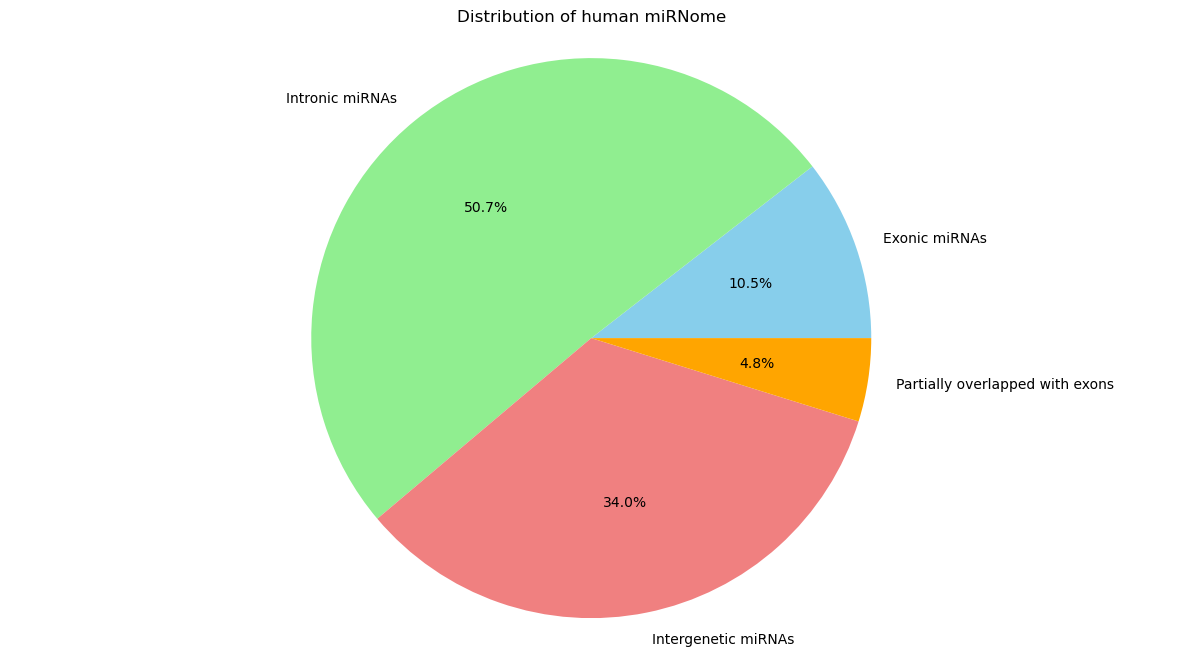

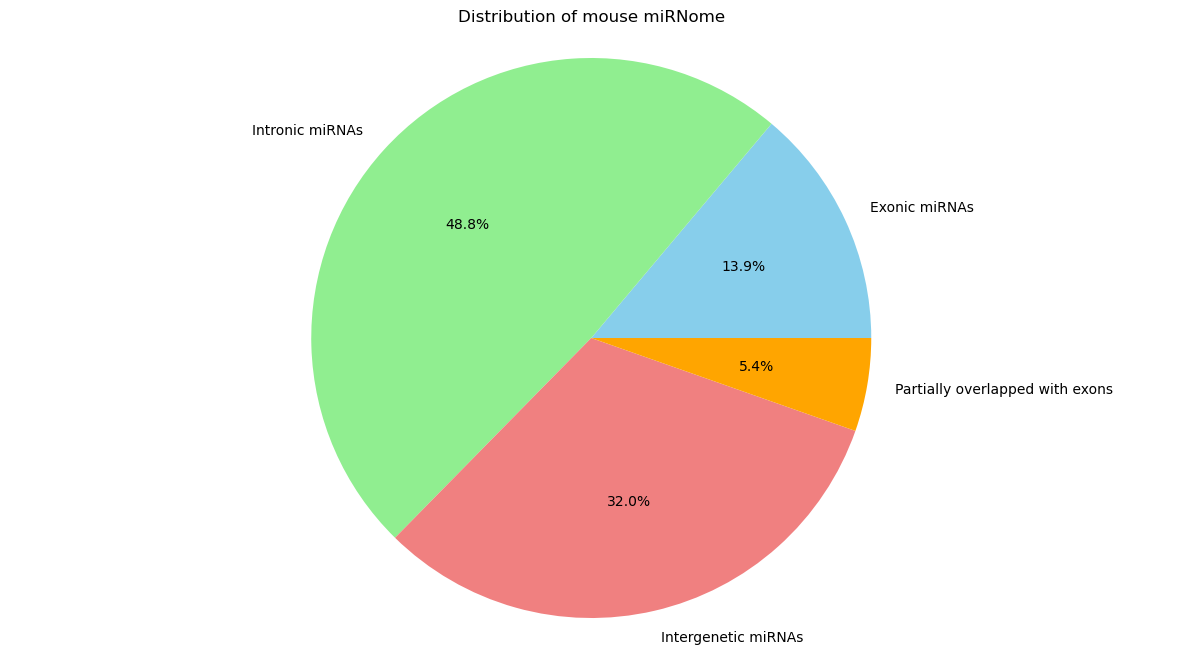

In [281]:
#Human miR loci distribution pie Chart
labels = ['Exonic miRNAs', 'Intronic miRNAs', 'Intergenetic miRNAs','Partially overlapped with exons']
sizes = [hg_exonic['Count'], hg_intronic['Count'],hg_no_hostmRNA['Count'],hg_partexons['Count']]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange']
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of human miRNome')
plt.savefig('Distribution of human miRNome.eps')
plt.show()

#Mouse miR loci distribution pie Chart
labels = ['Exonic miRNAs', 'Intronic miRNAs', 'Intergenetic miRNAs','Partially overlapped with exons']
sizes = [mm_exonic['Count'], mm_intronic['Count'],mm_no_hostmRNA['Count'],mm_partexons['Count']]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange']
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of mouse miRNome')
plt.savefig('Distribution of mouse miRNome.eps')
plt.show()


# #Zebrafish miR loci distribution pie Chart
# labels = ['Exonic miRNAs', 'Intronic miRNAs', 'Intergenetic miRNAs','Partially overlapped with exons']
# sizes = [zf_exonic['Count'], zf_intronic['Count'],zf_no_hostmRNA['Count'],zf_partexons['Count']]
# colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange']
# plt.figure(figsize=(15, 8)) 
# plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
# plt.title('Distribution of zebrafish miRNome')
# plt.savefig('Distribution of zebrafish miRNome.eps')
# plt.show()

### Map the locations of exonic microRNAs using OOP(e.g. 3'UTR,5'UTR, CDS,etc.)

### Human

In [8]:
import import_ipynb
from EXONIC import Regions

importing Jupyter notebook from EXONIC.ipynb


In [301]:
#all_exonic_human_exonic_miR=Regions('./Human/human_exonic_miR(gene_type)_NCBI.csv')

In [302]:
#all_exonic_human_exonic_miR.select(['hostgene_NCBI_ID','hostgene_Name','hostgene_strand','miR_name', 
                                   'miR_strand','gene_type'])

In [303]:
#all_exonic_human_exonic_miR.df.to_excel('./Human/human_exonic_miR_list(all_host_genes)_NCBI.xlsx',index=False)

In [304]:
#finalized_human_exonic_miR=Regions('./Human/human_exonic_miR(gene_type)_NCBI.csv')

In [305]:
#finalized_human_exonic_miR.select_coding()#### select protein-coding genes

In [306]:
#finalized_human_exonic_miR.add_region()
#### add a new column called region, which will contain information of location of microRNAs such as 5'UTR,3'UTR,CDS

In [307]:
#finalized_human_exonic_miR.select(['hostgene_NCBI_ID','hostgene_Name','hostgene_strand','miR_name', 
                                   'miR_strand','region','gene_type'])

In [361]:
#finalized_human_exonic_miR.df.head()

,hostgene_NCBI_ID,hostgene_Name,hostgene_strand,miR_name,miR_strand,region,gene_type
0,XM_047427799.1,COP1,-,hsa-mir-1843,-,3'UTR,protein-coding gene
18,XM_047437906.1,LOC124904228,-,hsa-mir-2682,-,CDS,protein-coding gene
19,NM_006496.4,GNAI3,+,hsa-mir-197,+,3'UTR,protein-coding gene
21,XM_047443026.1,LYST,-,hsa-mir-1537,-,5'UTR,protein-coding gene
26,NM_032409.3,PINK1,+,hsa-mir-6084,+,CDS,protein-coding gene


In [309]:
#finalized_human_exonic_miR.df.to_excel('./Human/human_exonic_miR_list(protein_coding_host_genes)_NCBI.xlsx',index=False)

### Mouse

In [310]:
#all_exonic_mouse_exonic_miR=Regions('./Mouse/mouse_exonic_miR(gene_type)_NCBI.csv')

In [311]:
#all_exonic_mouse_exonic_miR.select(['hostgene_NCBI_ID','hostgene_Name','hostgene_strand','miR_name', 
                                   #'miR_strand','gene_type'])

In [312]:
#all_exonic_mouse_exonic_miR.df.to_excel('./Mouse/mouse_exonic_miR_list(all_host_genes)_NCBI.xlsx',index=False)

In [313]:
#finalized_mouse_exonic_miR=Regions('./Mouse/mouse_exonic_miR(gene_type)_NCBI.csv')

In [314]:
#finalized_mouse_exonic_miR.select_coding()#### select protein-coding genes

In [315]:
#finalized_mouse_exonic_miR.add_region()
#### add a new column called region, which will contain information of location of microRNAs such as 5'UTR,3'UTR,CDS

In [316]:
#finalized_mouse_exonic_miR.select(['hostgene_NCBI_ID','hostgene_Name','hostgene_strand','miR_name', 
                                   #'miR_strand','region','gene_type'])

In [317]:
#finalized_mouse_exonic_miR.df.head(10)

,hostgene_NCBI_ID,hostgene_Name,hostgene_strand,miR_name,miR_strand,region,gene_type
10,XM_030248982.1,Strbp,-,mmu-mir-5128,-,5'UTR,protein-coding gene
11,NM_010434.2,Hipk3,-,mmu-mir-1902,-,3'UTR,protein-coding gene
12,NM_001145824.1,Hipk3,-,mmu-mir-1902,-,3'UTR,protein-coding gene
13,XM_006500575.3,Lama5,-,mmu-mir-7005,-,CDS,protein-coding gene
16,XM_011239023.3,Gad2,+,mmu-mir-3967,+,3'UTR,protein-coding gene
17,XM_006498476.4,Cercam,+,mmu-mir-219b,+,5'UTR,protein-coding gene
19,NM_001004174.2,AA467197,+,mmu-mir-147,+,3'UTR,protein-coding gene
21,NM_001355516.1,Rps21,+,mmu-mir-3091,+,5'UTR,protein-coding gene
23,NM_001289701.1,Pde4dip,-,mmu-mir-7225,-,3'UTR,protein-coding gene
24,NM_001039376.2,Pde4dip,-,mmu-mir-7225,-,3'UTR,protein-coding gene


In [318]:
#finalized_mouse_exonic_miR.df.to_excel('./Mouse/mouse_exonic_miR_list(protein_coding_host_genes)_NCBI.xlsx',index=False)

### Zebrafish

In [319]:
all_exonic_zfish_exonic_miR=Regions('./Zebrafish/zfish_exonic_miR(gene_type)_NCBI.csv')

In [320]:
all_exonic_zfish_exonic_miR.select(['hostgene_NCBI_ID','hostgene_Name','hostgene_strand','miR_name', 
                                   'miR_strand','gene_type'])

In [321]:
all_exonic_zfish_exonic_miR.df.to_excel('./Zebrafish/zfish_exonic_miR_list(all_host_genes)_NCBI.xlsx',index=False)

In [322]:
finalized_zfish_exonic_miR=Regions('./Zebrafish/zfish_exonic_miR(gene_type)_NCBI.csv')

In [323]:
finalized_zfish_exonic_miR.select_coding()#### select protein-coding genes

In [324]:
finalized_zfish_exonic_miR.add_region()
#### add a new column called region, which will contain information of location of microRNAs such as 5'UTR,3'UTR,CDS

In [325]:
finalized_zfish_exonic_miR.select(['hostgene_NCBI_ID','hostgene_Name','hostgene_strand','miR_name', 
                                   'miR_strand','region','gene_type'])

In [326]:
finalized_zfish_exonic_miR.df.head(10)

,hostgene_NCBI_ID,hostgene_Name,hostgene_strand,miR_name,miR_strand,region,gene_type
0,NM_001122749.1,dgcr8,+,dre-mir-1306,+,CDS,protein-coding gene
1,XM_021478771.1,fev,-,dre-mir-1788,-,5'UTR,protein-coding gene
2,XM_021478770.1,fev,-,dre-mir-1788,-,5'UTR,protein-coding gene
4,XM_021469725.1,hoxc4a,+,dre-mir-10b-2,+,5'UTR,protein-coding gene
6,NM_001122749.1,dgcr8,+,dre-mir-1306,+,CDS,protein-coding gene


In [327]:
finalized_zfish_exonic_miR.df.to_excel('./Zebrafish/zfish_exonic_miR_list(protein_coding_host_genes)_NCBI.xlsx',index=False)

In [328]:
finalized_zfish_exonic_miR.df

,hostgene_NCBI_ID,hostgene_Name,hostgene_strand,miR_name,miR_strand,region,gene_type
0,NM_001122749.1,dgcr8,+,dre-mir-1306,+,CDS,protein-coding gene
1,XM_021478771.1,fev,-,dre-mir-1788,-,5'UTR,protein-coding gene
2,XM_021478770.1,fev,-,dre-mir-1788,-,5'UTR,protein-coding gene
4,XM_021469725.1,hoxc4a,+,dre-mir-10b-2,+,5'UTR,protein-coding gene
6,NM_001122749.1,dgcr8,+,dre-mir-1306,+,CDS,protein-coding gene


### Plotting

In [148]:
human_exonicmiR_df.shape

(201, 15)

In [149]:
human_exonicmiR_coding_df=Regions('./Human/human_exonic_miR(gene_type)_NCBI.csv')

In [150]:
human_exonicmiR_coding_df.select_coding()

In [152]:
human_exonicmiR_coding_df.add_region()

In [153]:
human_exonic_miR_region=human_exonicmiR_coding_df.df.groupby(human_exonicmiR_coding_df.df['region']).size().reset_index(name='Human')

In [154]:
human_exonic_miR_region

,region,Human
0,3'UTR,57
1,5'UTR,29
2,CDS,25
3,Span from CDS and 3'UTR,4
4,Span from CDS and 5'UTR,1


### Mouse

In [168]:
mouse_exonicmiR_df.shape

(170, 15)

In [169]:
mouse_exonicmiR_coding_df=Regions('./Mouse/mouse_exonic_miR(gene_type)_NCBI.csv')

In [171]:
mouse_exonicmiR_coding_df.select_coding()

In [172]:
mouse_exonicmiR_coding_df.add_region()

In [177]:
mouse_exonicmiR_coding_df.df.shape

(80, 16)

In [189]:
mouse_exonic_miR_region=mouse_exonicmiR_coding_df.df.groupby(mouse_exonicmiR_coding_df.df['region']).size().reset_index(name='Mouse')

In [190]:
mouse_exonic_miR_region

,region,Mouse
0,3'UTR,32
1,5'UTR,26
2,CDS,19
3,Span from CDS and 3'UTR,2
4,Span from CDS and 5'UTR,1


### Zebrafish

In [333]:
#zfish_exonic_miR_region=finalized_zfish_exonic_miR.df.groupby(finalized_zfish_exonic_miR.df['region']).size().reset_index(name='Zebrafish')

In [180]:
#zfish_exonic_miR_region

### Species merge

In [336]:
# speices_exonic_miR_region=speices_exonic_miR_region.merge(zfish_exonic_miR_region,on="region",how="left")

In [337]:
# speices_exonic_miR_region['Zebrafish']=speices_exonic_miR_region['Zebrafish'].fillna(0)

In [191]:
speices_exonic_miR_region=human_exonic_miR_region.merge(mouse_exonic_miR_region,on="region",how="left")

In [192]:
speices_exonic_miR_region

,region,Human,Mouse
0,3'UTR,57,32
1,5'UTR,29,26
2,CDS,25,19
3,Span from CDS and 3'UTR,4,2
4,Span from CDS and 5'UTR,1,1


In [193]:
speices_exonic_miR_region=speices_exonic_miR_region.set_index('region')

In [194]:
speices_exonic_miR_region=speices_exonic_miR_region.T

In [195]:
speices_exonic_miR_region

region,3'UTR,5'UTR,CDS,Span from CDS and 3'UTR,Span from CDS and 5'UTR
Human,57,29,25,4,1
Mouse,32,26,19,2,1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 500x800 with 0 Axes>

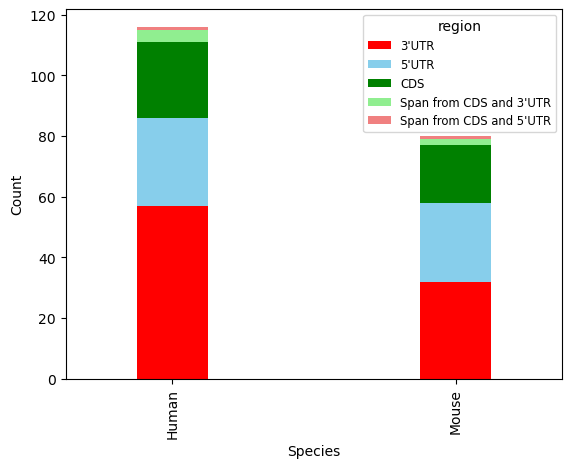

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(5,8))
speices_exonic_miR_region.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green','lightgreen', 'lightcoral', 'orange'],width=0.25)
# labels for x & y axis


plt.legend(title='region',loc="upper right", fontsize="small")
plt.xlabel('Species')
plt.ylabel('Count')
plt.savefig('Distribution of exonic miRNome.eps')
plt.show()

In [197]:
mm_exonic_3_UTR= mouse_exonic_miR_region[mouse_exonic_miR_region['region']=='3\'UTR'].sum()
mm_exonic_5_UTR= mouse_exonic_miR_region[mouse_exonic_miR_region['region']=='5\'UTR'].sum()
mm_exonic_CDS=mouse_exonic_miR_region[mouse_exonic_miR_region['region']=='CDS'].sum()
mm_exonic_3_CDS_UTR=mouse_exonic_miR_region[mouse_exonic_miR_region['region']=='Span from CDS and 3\'UTR'].sum()
mm_exonic_5_CDS_UTR=mouse_exonic_miR_region[mouse_exonic_miR_region['region']=='Span from CDS and 5\'UTR'].sum()

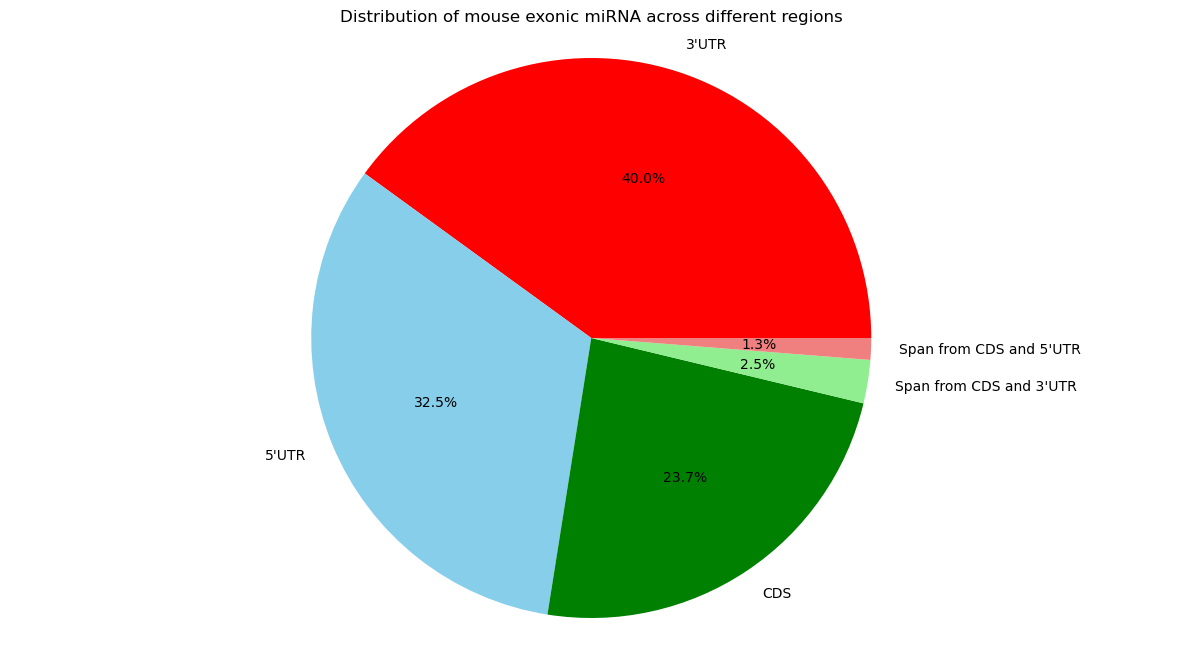

In [198]:
labels = ['3\'UTR', '5\'UTR', 'CDS','Span from CDS and 3\'UTR','Span from CDS and 5\'UTR']
sizes = [mm_exonic_3_UTR['Mouse'], mm_exonic_5_UTR['Mouse'],mm_exonic_CDS['Mouse'],mm_exonic_3_CDS_UTR['Mouse'],mm_exonic_5_CDS_UTR['Mouse']]
colors = ['red', 'skyblue', 'green','lightgreen', 'lightcoral']
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of mouse exonic miRNA across different regions')
plt.savefig('Distribution of mouse exonic miRNA across different regions of the gene.eps')
plt.show()

In [199]:
hg_exonic_3_UTR= human_exonic_miR_region[human_exonic_miR_region['region']=='3\'UTR'].sum()
hg_exonic_5_UTR= human_exonic_miR_region[human_exonic_miR_region['region']=='5\'UTR'].sum()
hg_exonic_CDS=human_exonic_miR_region[human_exonic_miR_region['region']=='CDS'].sum()
hg_exonic_3_CDS_UTR=human_exonic_miR_region[human_exonic_miR_region['region']=='Span from CDS and 3\'UTR'].sum()
hg_exonic_5_CDS_UTR=human_exonic_miR_region[human_exonic_miR_region['region']=='Span from CDS and 5\'UTR'].sum()

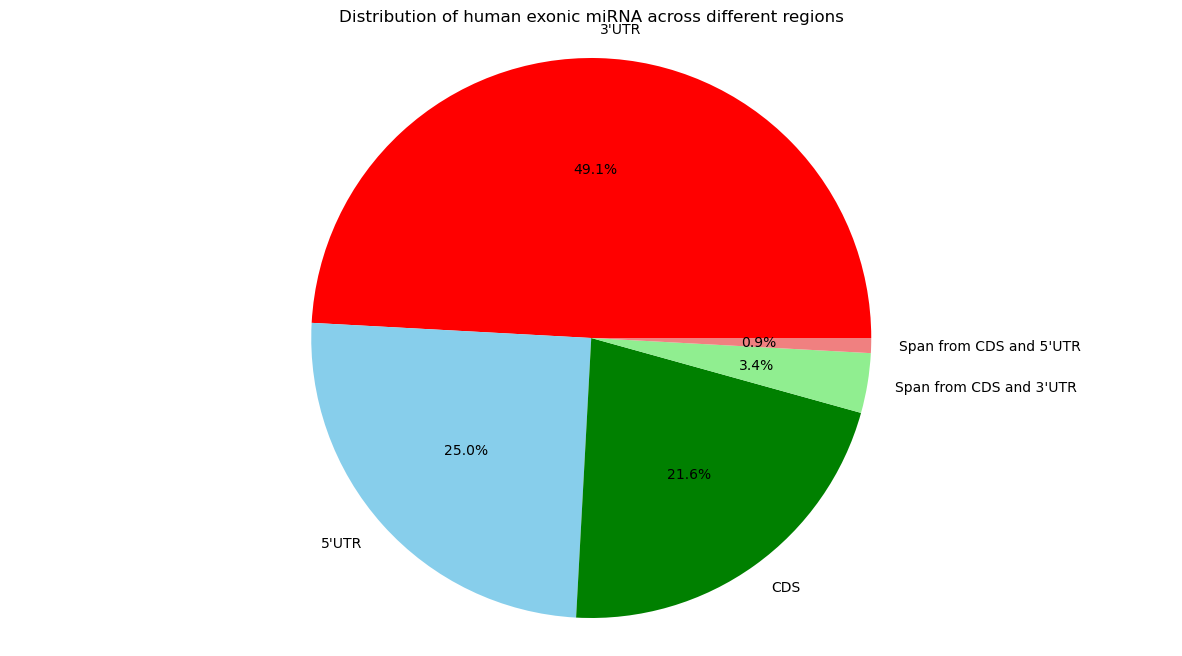

In [200]:
labels = ['3\'UTR', '5\'UTR', 'CDS','Span from CDS and 3\'UTR','Span from CDS and 5\'UTR']
sizes = [hg_exonic_3_UTR['Human'], hg_exonic_5_UTR['Human'],hg_exonic_CDS['Human'],hg_exonic_3_CDS_UTR['Human'],hg_exonic_5_CDS_UTR['Human']]
colors = ['red', 'skyblue', 'green','lightgreen', 'lightcoral']
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of human exonic miRNA across different regions')
plt.savefig('Distribution of human exonic miRNA across different regions of the gene.eps')
plt.show()

### Noncoding vs Coding genes(Exonic_PLOT)

### Human

In [285]:
human_exonicmiR_df_gene_type=human_exonicmiR_df.drop_duplicates(subset=['miR_name'])

In [286]:
hg_miR_gene_type=human_exonicmiR_df.groupby(human_exonicmiR_df_gene_type['gene_type']).size().reset_index(name='Count')

In [287]:
hg_miR_gene_type

,gene_type,Count
0,non-coding gene,85
1,protein-coding gene,116


In [288]:
hg_exonic_proteincoding= hg_miR_gene_type[hg_miR_gene_type['gene_type']=='protein-coding gene'].sum()
hg_exonic_noncoding= hg_miR_gene_type[hg_miR_gene_type['gene_type']=='non-coding gene'].sum()

### Mouse

In [292]:
mouse_exonicmiR_df.drop_duplicates(subset=['miR_name'],inplace=True)

In [294]:
mouse_exonicmiR_df.shape

(170, 15)

In [296]:
mm_miR_gene_type=mouse_exonicmiR_df.groupby(mouse_exonicmiR_df['gene_type']).size().reset_index(name='Count')

In [297]:
mm_miR_gene_type

,gene_type,Count
0,non-coding gene,90
1,protein-coding gene,80


In [298]:
mm_exonic_proteincoding=mm_miR_gene_type[hg_miR_gene_type['gene_type']=='protein-coding gene'].sum()
mm_exonic_noncoding=mm_miR_gene_type[hg_miR_gene_type['gene_type']=='non-coding gene'].sum()

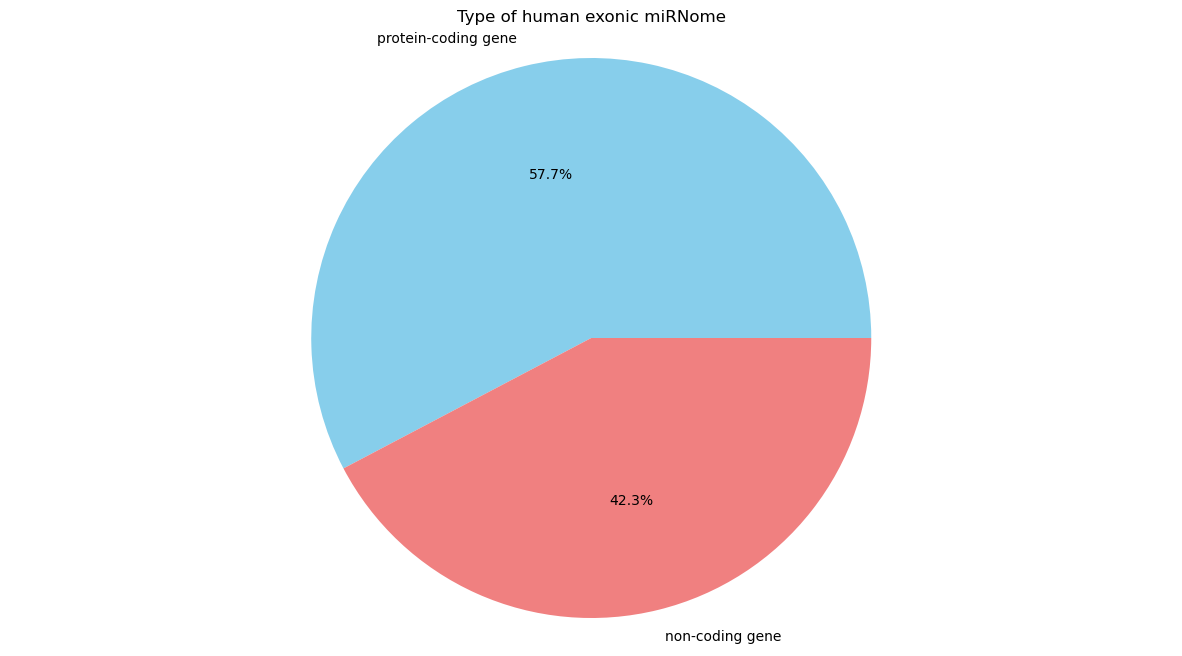

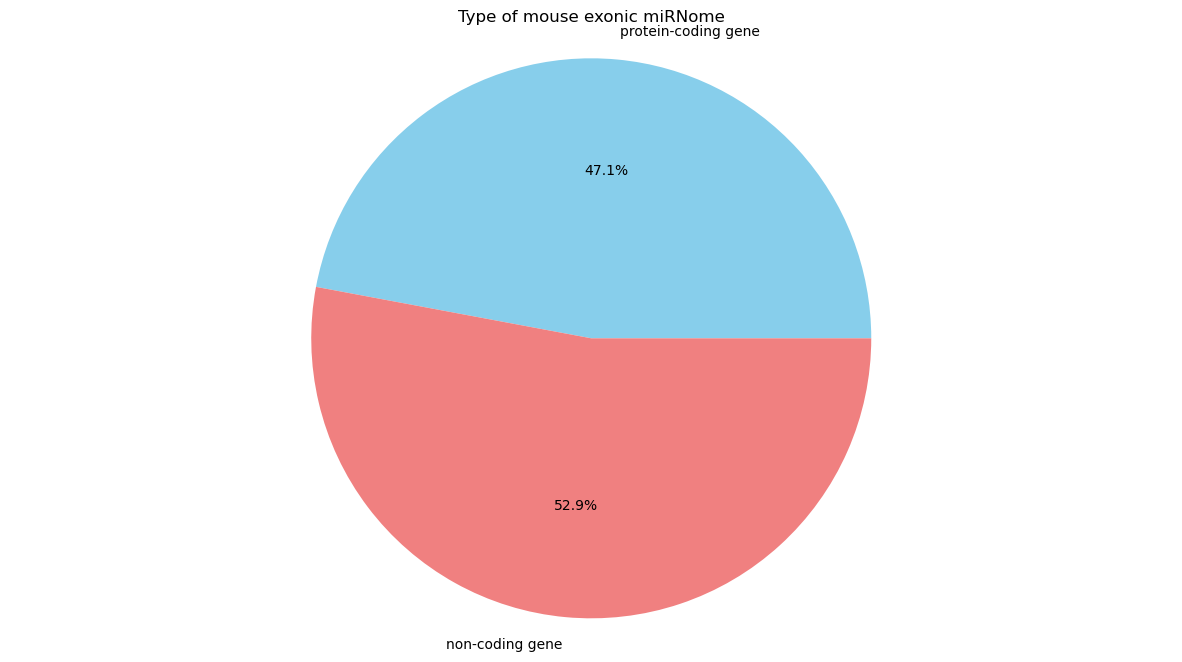

In [299]:
#Human miR loci distribution pie Chart
labels = ['protein-coding gene', 'non-coding gene']
sizes = [hg_exonic_proteincoding['Count'], hg_exonic_noncoding['Count']]
colors = ['skyblue','lightcoral', ]
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of human exonic miRNome')
plt.savefig('Type of human exonic miRNome.eps')
plt.show()



#Mouse miR loci distribution pie Chart
labels = ['protein-coding gene', 'non-coding gene']
sizes = [mm_exonic_proteincoding['Count'], mm_exonic_noncoding['Count']]
colors = ['skyblue','lightcoral', ]
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of mouse exonic miRNome')
plt.savefig('Type of mouse exonic miRNome.eps')
plt.show()

### Noncodin vs Coding genes(Intronic_PLOT)

In [300]:
human_intronicmiR_df_gene_type=human_intronicmiR_df.drop_duplicates(subset=['miR_name'])

In [301]:
hg_miR_intronic_gene_type=human_intronicmiR_df.groupby(human_intronicmiR_df_gene_type['gene_type']).size().reset_index(name='Count')

In [302]:
hg_miR_intronic_gene_type

,gene_type,Count
0,non-coding gene,194
1,protein-coding gene,775


In [303]:
hg_intronic_proteincoding= hg_miR_intronic_gene_type[hg_miR_intronic_gene_type['gene_type']=='protein-coding gene'].sum()
hg_intronic_noncoding= hg_miR_intronic_gene_type[hg_miR_intronic_gene_type['gene_type']=='non-coding gene'].sum()

### Mouse

In [304]:
mouse_intronicmiR_df_gene_type=mouse_intronicmiR_df.drop_duplicates(subset=['miR_name'])

In [305]:
mm_miR_intronic_gene_type=mouse_intronicmiR_df.groupby(mouse_intronicmiR_df_gene_type['gene_type']).size().reset_index(name='Count')

In [306]:
mm_miR_intronic_gene_type

,gene_type,Count
0,non-coding gene,89
1,protein-coding gene,510


In [307]:
mm_intronic_proteincoding=mm_miR_intronic_gene_type[mm_miR_intronic_gene_type['gene_type']=='protein-coding gene'].sum()
mm_intronic_noncoding=mm_miR_intronic_gene_type[mm_miR_intronic_gene_type['gene_type']=='non-coding gene'].sum()

### Zebrafish

In [ ]:
zfish_intronicmiR_df_gene_type=zfish_intronicmiR_df.drop_duplicates(subset=['miR_name'])

In [ ]:
zf_miR_intronic_gene_type=zfish_intronicmiR_df.groupby(mouse_intronicmiR_df_gene_type['gene_type']).size().reset_index(name='Count')

In [ ]:
zf_miR_intronic_gene_type

In [ ]:
zf_intronic_proteincoding=zf_miR_intronic_gene_type[zf_miR_intronic_gene_type['gene_type']=='protein-coding gene'].sum()
zf_intronic_noncoding=zf_miR_intronic_gene_type[zf_miR_intronic_gene_type['gene_type']=='non-coding gene'].sum()

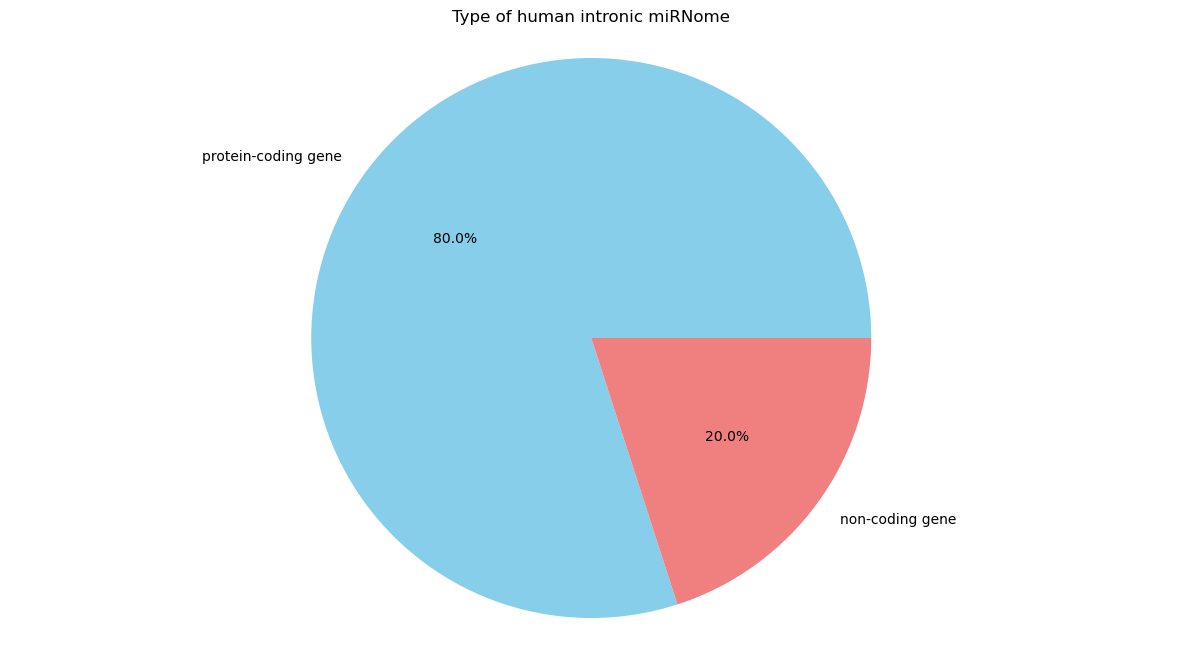

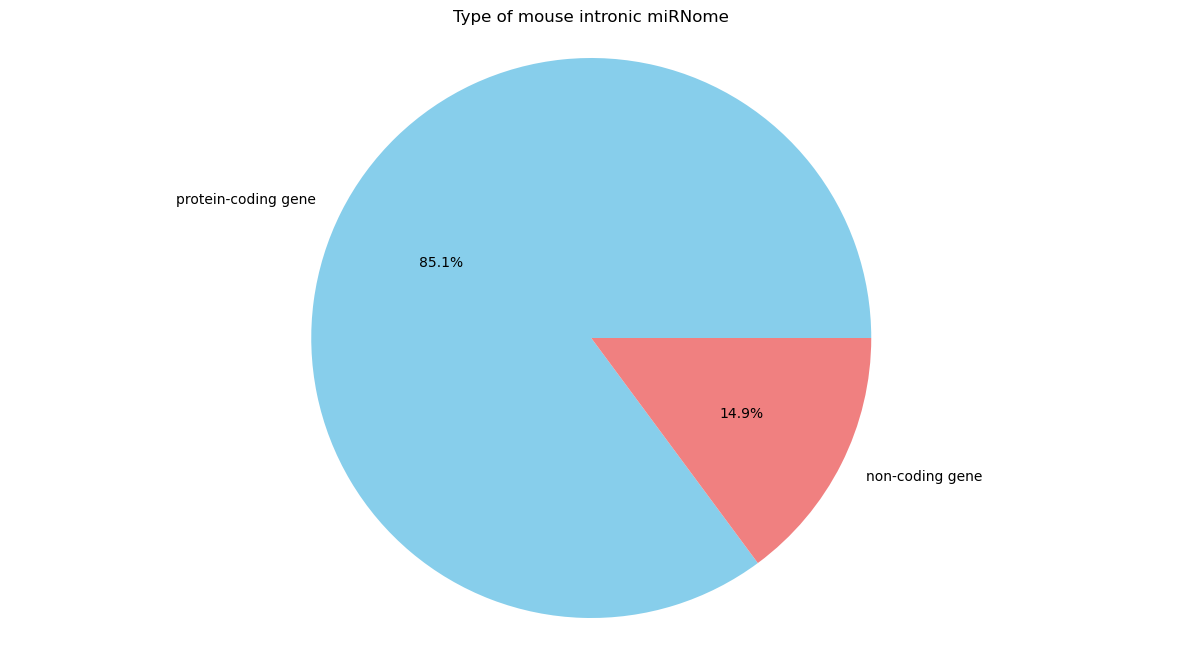

In [308]:
#Human miR loci distribution pie Chart
labels = ['protein-coding gene', 'non-coding gene']
sizes = [hg_intronic_proteincoding['Count'], hg_intronic_noncoding['Count']]
colors = ['skyblue','lightcoral', ]
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of human intronic miRNome')
plt.savefig('Type of human intronic miRNome.eps')
plt.show()



#Mouse miR loci distribution pie Chart
labels = ['protein-coding gene', 'non-coding gene']
sizes = [mm_intronic_proteincoding['Count'], mm_intronic_noncoding['Count']]
colors = ['skyblue','lightcoral', ]
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of mouse intronic miRNome')
plt.savefig('Type of mouse intronic miRNome.eps')
plt.show()

# #Zebrafish miR loci distribution pie Chart
# labels = ['protein-coding gene', 'non-coding gene']
# sizes = [zf_intronic_proteincoding['Count'], zf_intronic_noncoding['Count']]
# colors = ['skyblue','lightcoral', ]
# plt.figure(figsize=(15, 8)) 
# plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
# plt.title('Type of zebrafish intronic miRNome')
# # plt.savefig('Type of mouse intronic miRNome.eps')
# plt.show()